In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservation/Hotel Reservations.csv


In [99]:
df_hotel = pd.read_csv(os.path.join(dirname, filenames[0]))
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [100]:
df_hotel.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [101]:
columns_to_drop = ['Booking_ID']

# Drop the specified column(s)
df_hotel = df_hotel.drop(columns=columns_to_drop)

We have no missing data in the columns

In [102]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [103]:
df_hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [104]:
unique_counts = df_hotel.nunique()

print(unique_counts)

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64


Find out unique values for categorical variables

In [105]:
print('Unique values for type_of_meal_plan:\n', df_hotel.type_of_meal_plan.unique())

Unique values for type_of_meal_plan:
 ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [106]:
print('Unique values for room_type_reserved:\n', df_hotel.room_type_reserved.unique())

Unique values for room_type_reserved:
 ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


In [107]:
print('Unique values for market_segment_type:\n', df_hotel.market_segment_type.unique())

Unique values for market_segment_type:
 ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [108]:

print('Unique values for booking_status:\n', df_hotel.booking_status.unique())

Unique values for booking_status:
 ['Not_Canceled' 'Canceled']


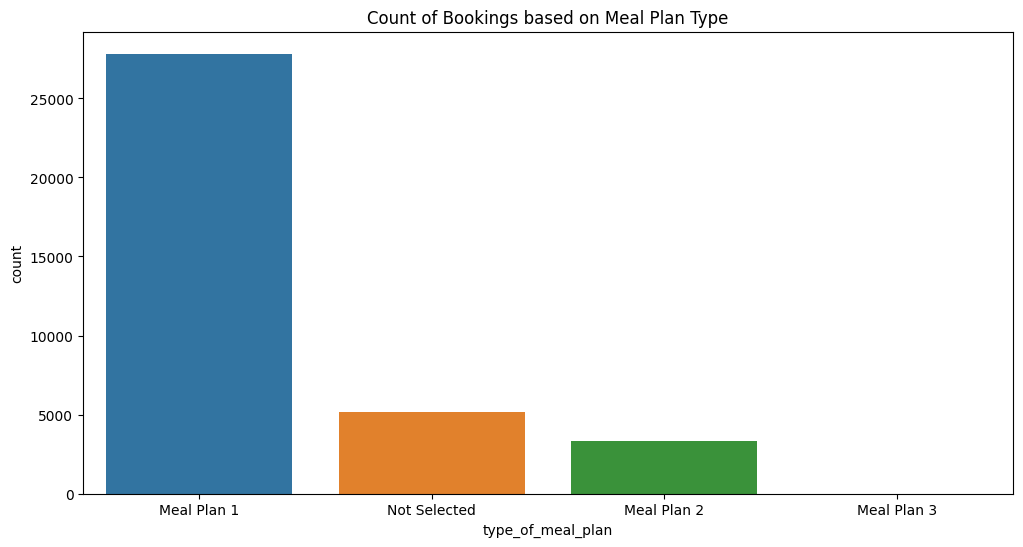

In [109]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type_of_meal_plan', data=df_hotel)
plt.title('Count of Bookings based on Meal Plan Type')
plt.show()

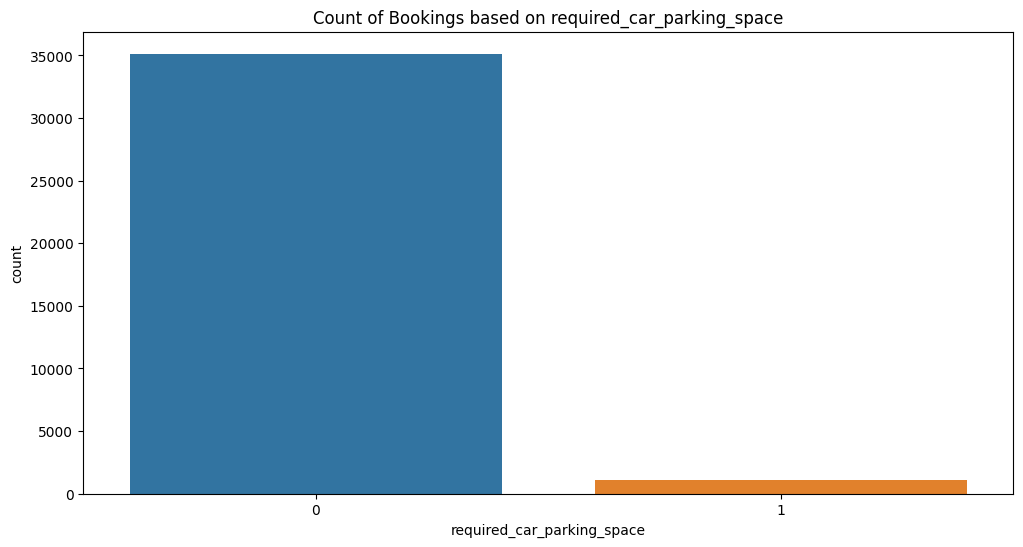

In [110]:
   
plt.figure(figsize=(12, 6))
sns.countplot(x='required_car_parking_space', data=df_hotel)
plt.title('Count of Bookings based on required_car_parking_space')
plt.show()

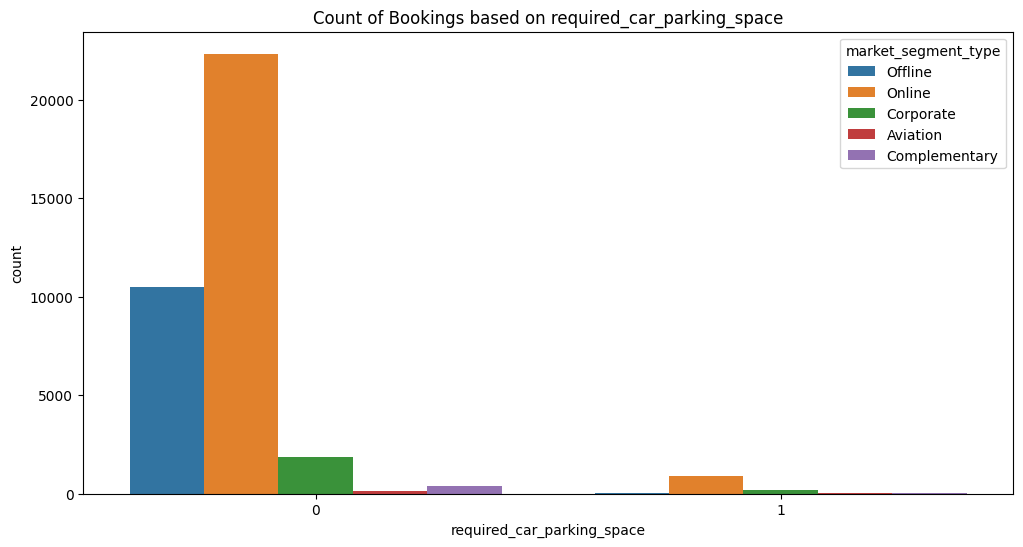

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(x='required_car_parking_space', data=df_hotel, hue='market_segment_type')
plt.title('Count of Bookings based on required_car_parking_space')
plt.show()

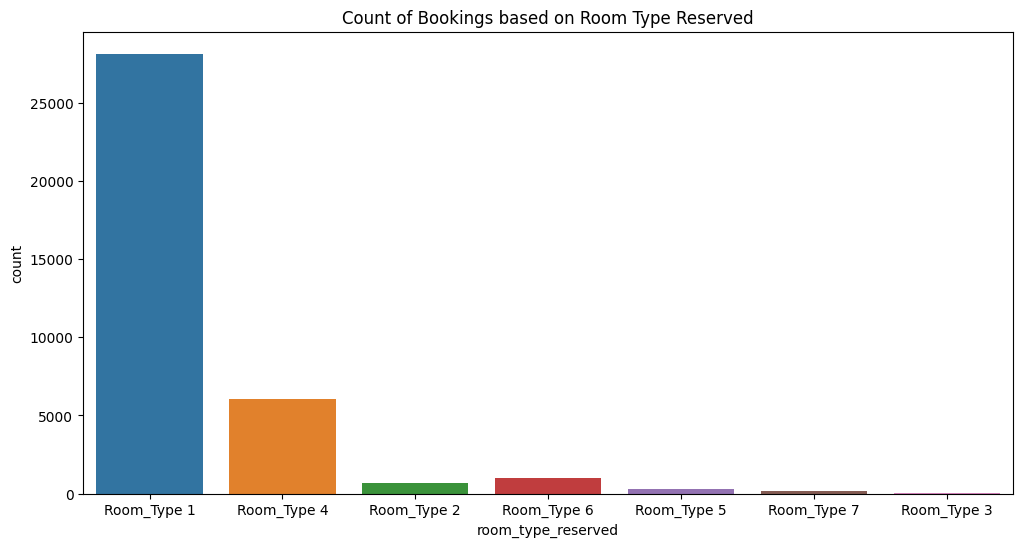

In [112]:
plt.figure(figsize=(12, 6))
sns.countplot(x='room_type_reserved', data=df_hotel)
plt.title('Count of Bookings based on Room Type Reserved')
plt.show()

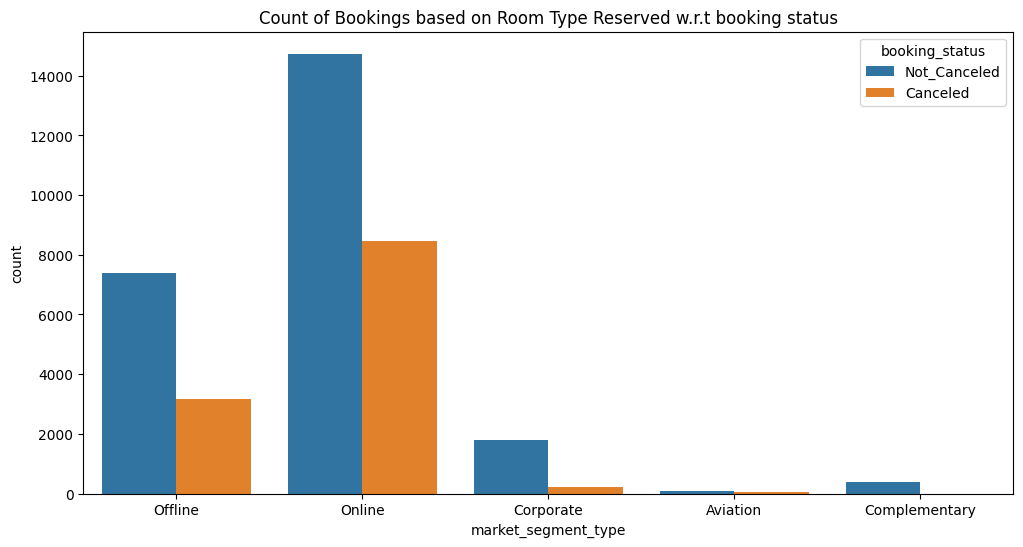

In [113]:
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment_type', data=df_hotel, hue='booking_status')
plt.title('Count of Bookings based on Room Type Reserved w.r.t booking status')
plt.show()

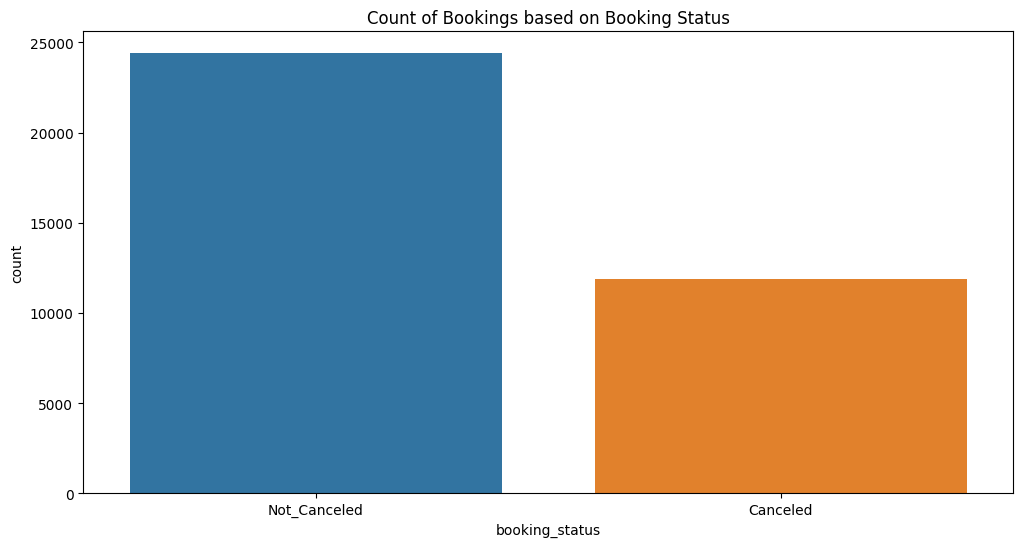

In [114]:
plt.figure(figsize=(12, 6))
sns.countplot(x='booking_status', data=df_hotel)
plt.title('Count of Bookings based on Booking Status')
plt.show()

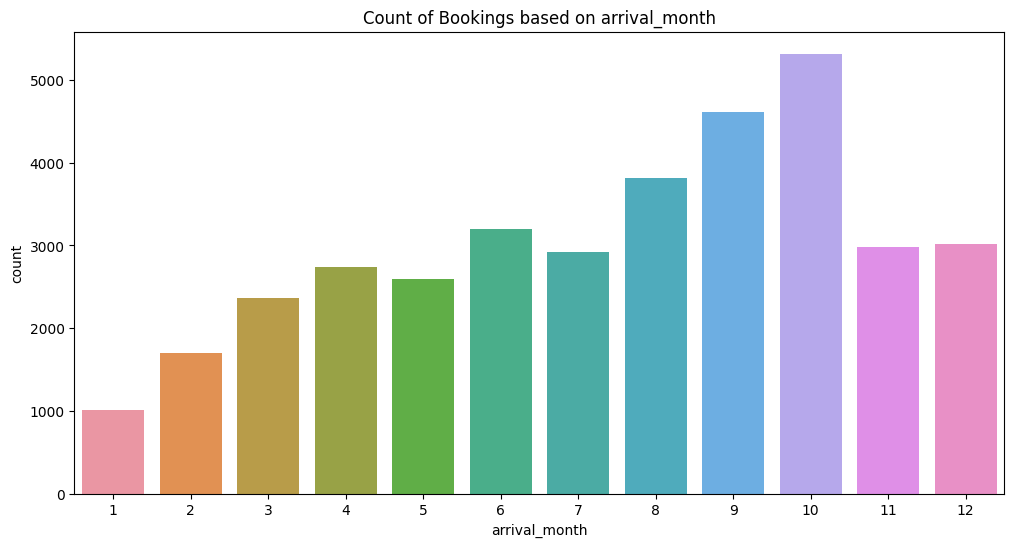

In [115]:

plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_month', data=df_hotel)
plt.title('Count of Bookings based on arrival_month')
plt.show()

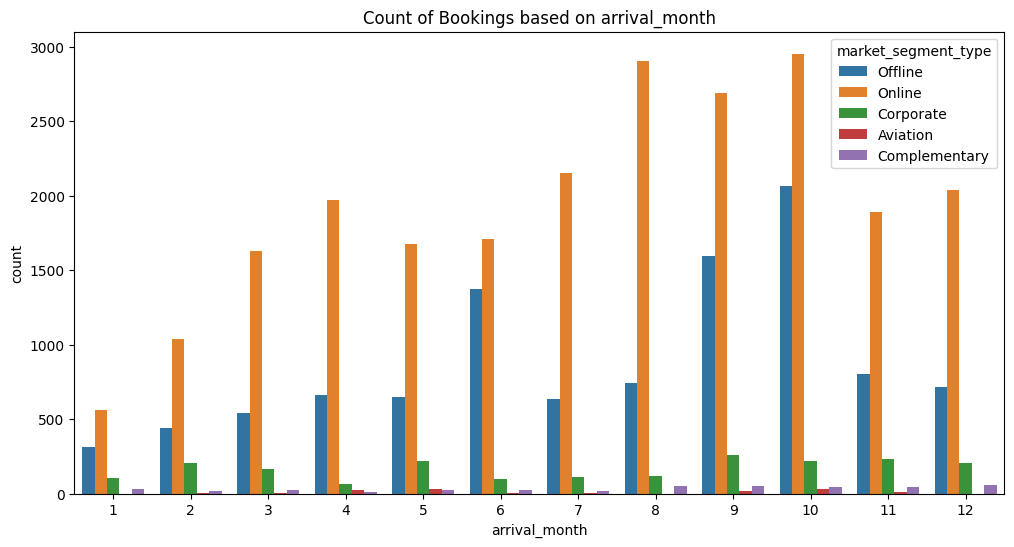

In [116]:

plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_month', data=df_hotel, hue='market_segment_type')
plt.title('Count of Bookings based on arrival_month')
plt.show()

In [117]:
# List of columns to one-hot encode
columns_to_encode = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Apply one-hot encoding
df_hotel_encoded = pd.get_dummies(df_hotel, columns=columns_to_encode, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_hotel_encoded.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 3  \
0             2               0 

In [118]:
df_hotel_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [119]:
# Select numerical columns
numerical_columns = df_hotel.select_dtypes(include=['int64', 'float64']).columns

# Create a new DataFrame with only numerical columns
df_numerical = df_hotel[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = df_numerical.corr()

# Display the correlation matrix
print(correlation_matrix)

                                      no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
required_car_parking_space                0.011429        0.034244   
lead_time                                 0.097287       -0.047091   
arrival_year                              0.076719        0.045983   
arrival_month                             0.021841       -0.003076   
arrival_date                              0.026338        0.025482   
repeated_guest                           -0.192277       -0.036348   
no_of_previous_cancellations             -0.047426       -0.016390   
no_of_previous_bookings_not_canceled     -0.119166       -0.021189   
avg_price_per_room                        0.296886        0.337728   
no_of_special_reques

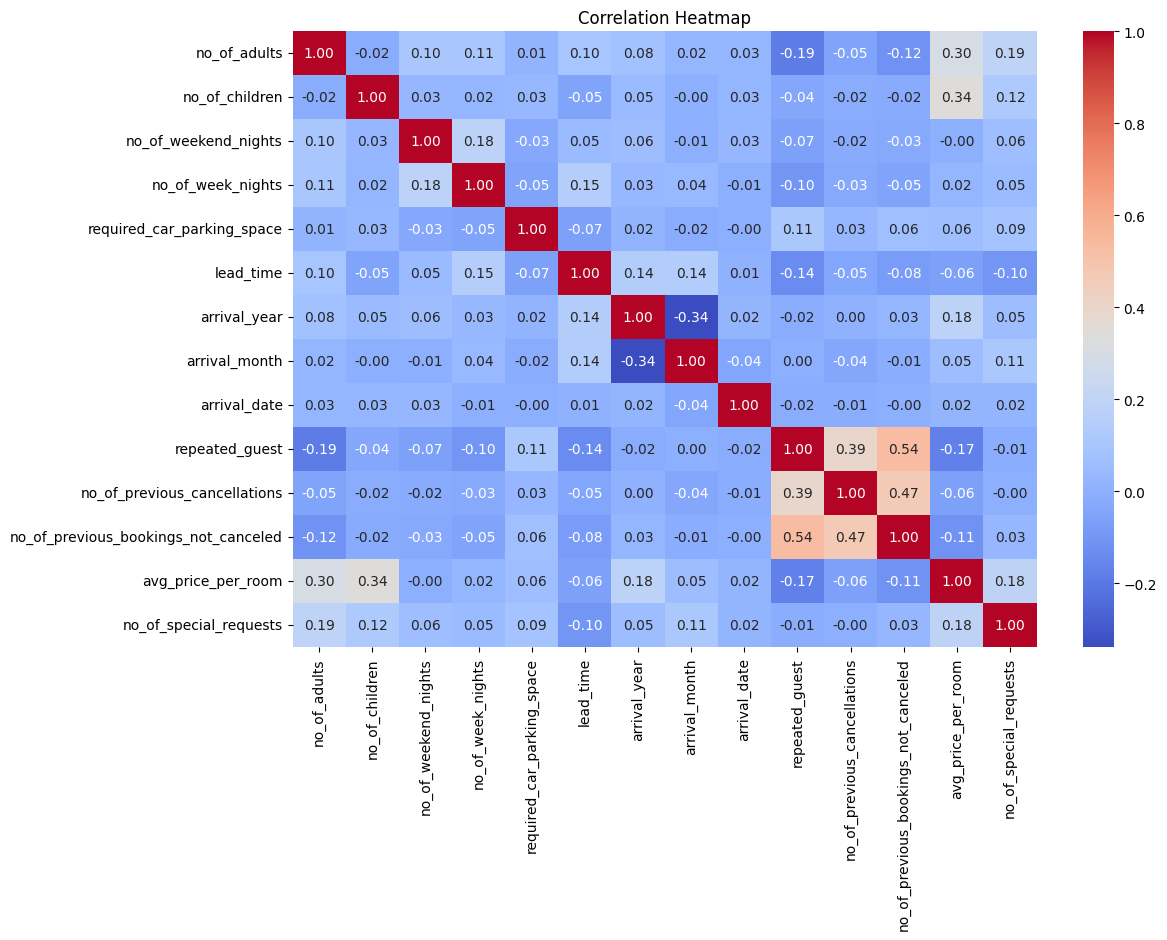

In [120]:

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

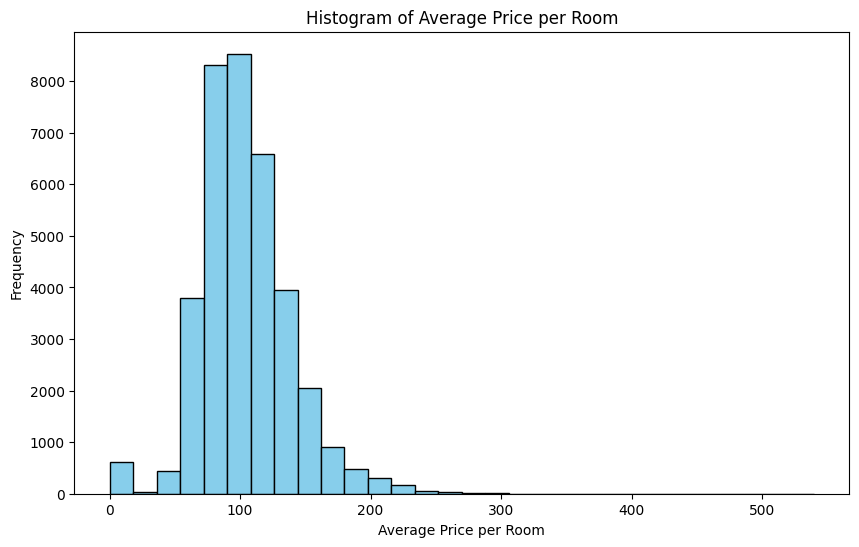

In [121]:
plt.figure(figsize=(10, 6))
plt.hist(df_hotel['avg_price_per_room'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Price per Room')
plt.xlabel('Average Price per Room')
plt.ylabel('Frequency')
plt.show()

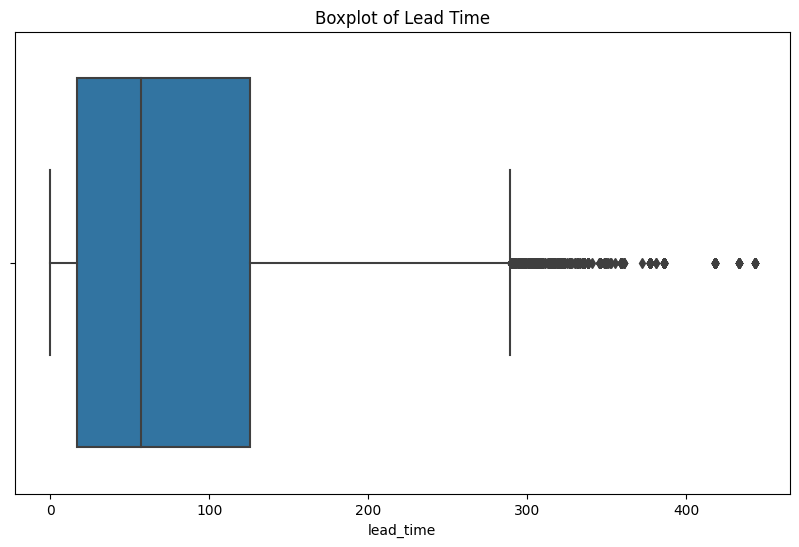

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='lead_time', data=df_hotel)
plt.title('Boxplot of Lead Time')
plt.show()

In [123]:
print(df_hotel.describe())


       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     8

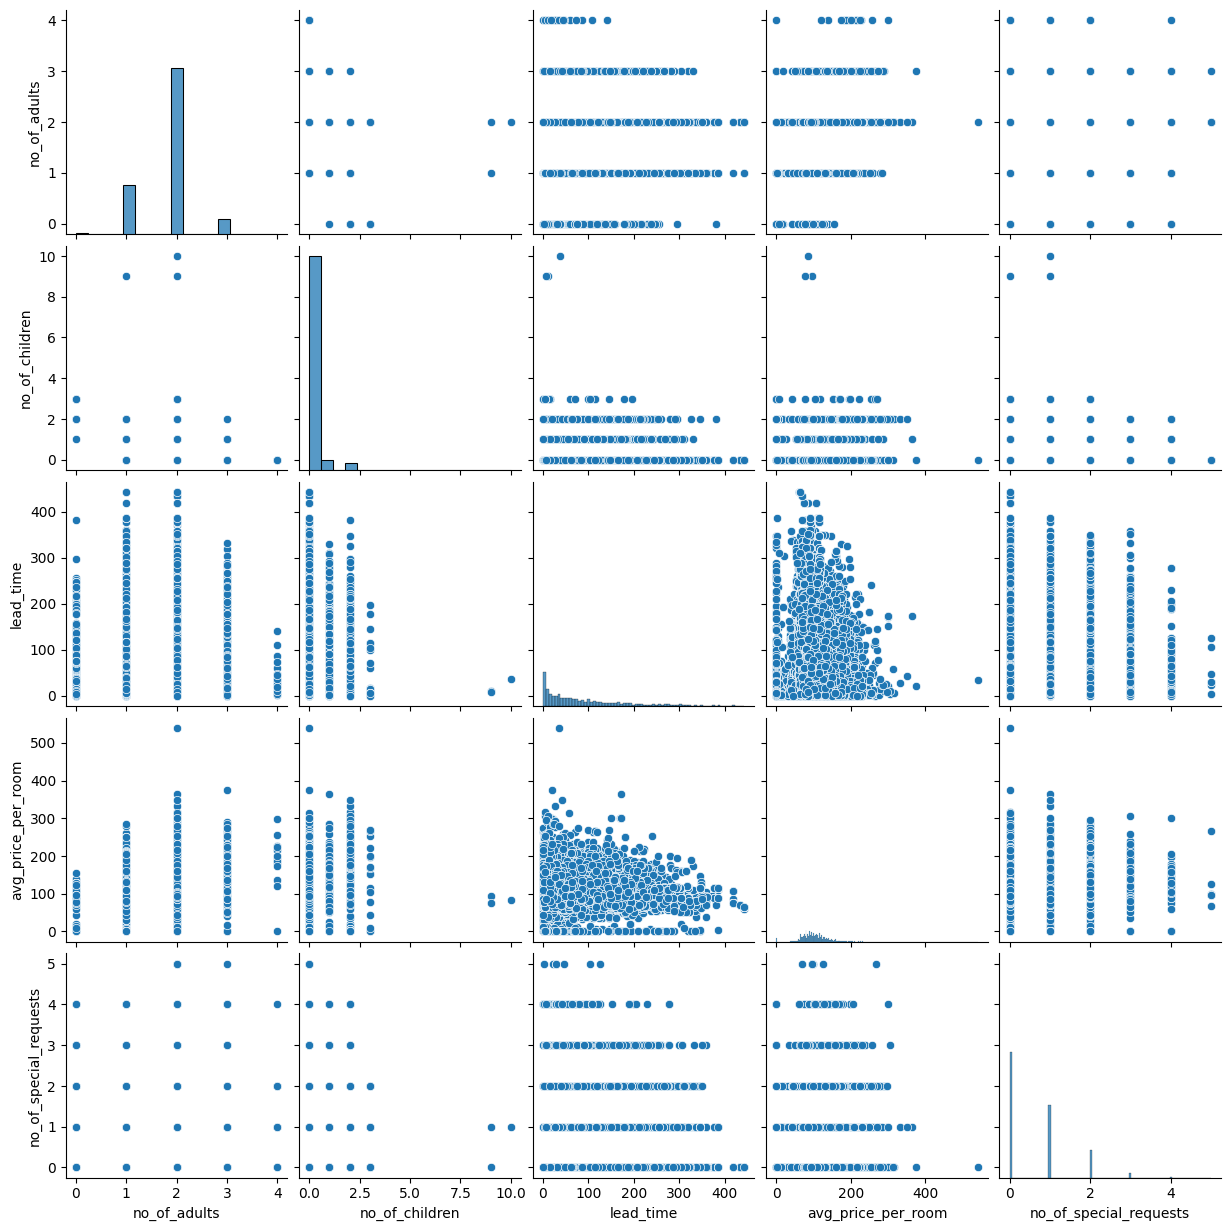

In [124]:
sns.pairplot(df_hotel[['no_of_adults', 'no_of_children', 'lead_time', 'avg_price_per_room', 'no_of_special_requests']])
plt.show()

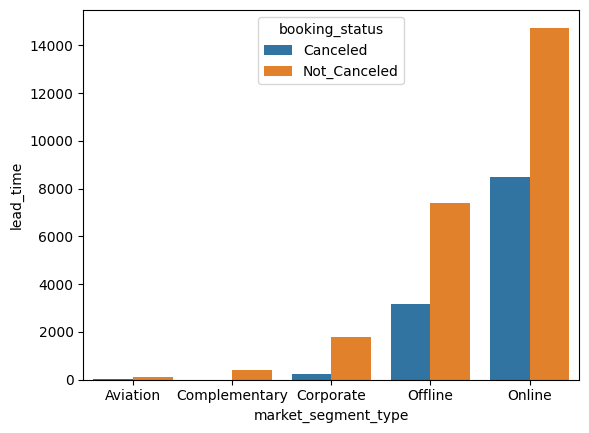

In [125]:
#How does cancellation looks like for different market segment types.

ax=sns.barplot(x='market_segment_type',y='lead_time',hue='booking_status', data=df_hotel.groupby(["market_segment_type","booking_status"]).lead_time.count().reset_index())
#ax.legend(legend_data)
plt.show()

In [126]:
df_hotel_encoded.groupby(["booking_status_Not_Canceled"]).mean().reset_index()
#df_hotel_encoded.info()

,booking_status_Not_Canceled,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,False,1.909550,0.124358,0.887505,2.392259,0.009592,139.215482,2017.919142,7.374253,15.730080,...,0.019184,0.000168,0.174085,0.006058,0.034161,0.003029,0.000000,0.018511,0.265292,0.713084
1,True,1.813489,0.095982,0.773309,2.112710,0.041410,58.927224,2017.772325,7.447724,15.532144,...,0.019024,0.000205,0.163510,0.007913,0.022960,0.005002,0.016031,0.073678,0.302378,0.604305


In [127]:
df_hotel_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [128]:
data_line_plot=df_hotel[['arrival_year','arrival_month','lead_time']].groupby(['arrival_year',"arrival_month"]).mean().reset_index()
data_line_plot

,arrival_year,arrival_month,lead_time
0,2017,7,146.977961
1,2017,8,42.250493
2,2017,9,56.692541
3,2017,10,66.251960
4,2017,11,34.425039
5,2017,12,48.378233
6,2018,1,34.898422
7,2018,2,31.313380
8,2018,3,47.139525
9,2018,4,74.252558


/tmp/ipykernel_42/2853650254.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(x='arrival_month',y='lead_time',data=data_line_plot,hue='arrival_year',marker='o',palette=['red','blue','green'])


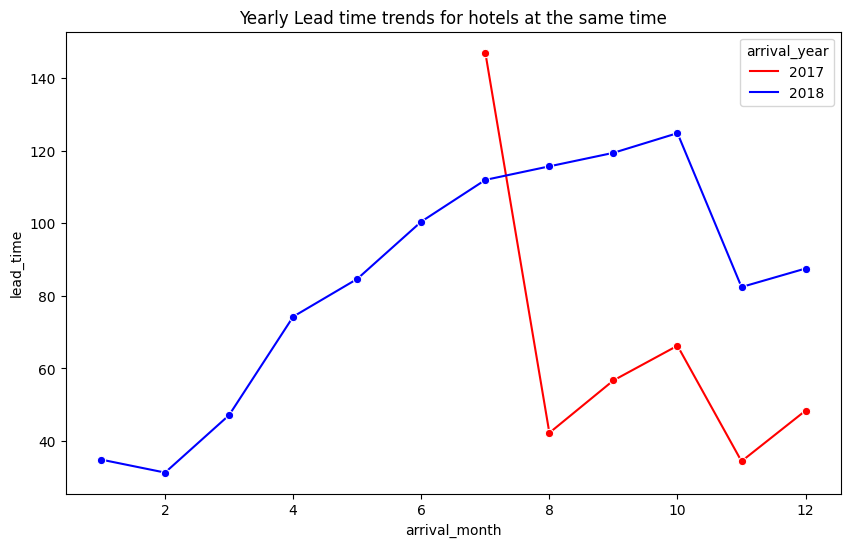

In [129]:
plt.figure(figsize=(10,6))
plt.title('Yearly Lead time trends for hotels at the same time')
sns.lineplot(x='arrival_month',y='lead_time',data=data_line_plot,hue='arrival_year',marker='o',palette=['red','blue','green'])
plt.show()

In [130]:
df_hotel_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [131]:
y=df_hotel_encoded['booking_status_Not_Canceled']

In [132]:
x=df_hotel_encoded.drop(['booking_status_Not_Canceled'],axis=1)

# KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_hotel_encoded.drop('booking_status_Not_Canceled', axis=1)
y = df_hotel_encoded['booking_status_Not_Canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model and fit it to the training data
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of 'n_neighbors'
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN without SMOTE): {accuracy_knn:.2f}")

print("\nClassification Report (KNN without SMOTE):")
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix (KNN without SMOTE):")
print(confusion_matrix(y_test, y_pred_knn))


Accuracy (KNN without SMOTE): 0.81

Classification Report (KNN without SMOTE):
              precision    recall  f1-score   support

       False       0.76      0.63      0.69      2416
        True       0.83      0.90      0.86      4839

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255


Confusion Matrix (KNN without SMOTE):
[[1520  896]
 [ 490 4349]]


# Apply SMOTE

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df_hotel_encoded.drop('booking_status_Not_Canceled', axis=1)
y = df_hotel_encoded['booking_status_Not_Canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the KNN model and fit it to the SMOTE-balanced training data
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of 'n_neighbors'
knn_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))


Accuracy (KNN): 0.79

Classification Report (KNN):
              precision    recall  f1-score   support

       False       0.65      0.76      0.70      2416
        True       0.87      0.80      0.83      4839

    accuracy                           0.79      7255
   macro avg       0.76      0.78      0.77      7255
weighted avg       0.80      0.79      0.79      7255


Confusion Matrix (KNN):
[[1836  580]
 [ 978 3861]]


# Analysis

Accuracy: KNN without SMOTE has a slightly higher accuracy (0.81) compared to KNN with SMOTE (0.79).

Precision (True): Precision for the positive class (True) is higher in KNN with SMOTE (0.87) compared to KNN without SMOTE (0.83). This indicates that when the model predicts a booking as not canceled, it is correct around 87% of the time after applying SMOTE.

Recall (True): Recall for the positive class (True) is higher in KNN without SMOTE (0.90) compared to KNN with SMOTE (0.80). This means that the model without SMOTE is better at capturing actual positive cases.

F1-score (True): The F1-score for the positive class is slightly higher in KNN without SMOTE (0.86) compared to KNN with SMOTE (0.83).

# Conclusion on Analysis

The choice between using KNN with or without SMOTE depends on your specific goals. If capturing positive cases (not canceled bookings) is more critical, the model without SMOTE may be preferred due to its higher recall for the positive class.
If achieving a balance between precision and recall is important, or if addressing class imbalance is a priority, then the model with SMOTE may be considered.
Consider tuning hyperparameters for both models and experimenting with other techniques to further improve performance. The trade-offs between precision and recall should align with the specific requirements of your application.

# Decision Tree

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [136]:
X = df_hotel_encoded.drop('booking_status_Not_Canceled', axis=1)
y = df_hotel_encoded['booking_status_Not_Canceled']


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [139]:
y_pred = dt_model.predict(X_test)


In [140]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.81      0.81      2416
        True       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.85      7255
weighted avg       0.87      0.87      0.87      7255


Confusion Matrix:
[[1969  447]
 [ 494 4345]]


# Applying SMOTE

In [141]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Separate features (X) and target variable (y)
X = df_hotel_encoded.drop('booking_status_Not_Canceled', axis=1)
y = df_hotel_encoded['booking_status_Not_Canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Decision Tree model and fit it to the SMOTE-balanced training data
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = dt_model_smote.predict(X_test)

# Evaluate the model performance after applying SMOTE
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy (after SMOTE): {accuracy_smote:.2f}")

print("\nClassification Report (after SMOTE):")
print(classification_report(y_test, y_pred_smote))

print("\nConfusion Matrix (after SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))


Accuracy (after SMOTE): 0.87

Classification Report (after SMOTE):
              precision    recall  f1-score   support

       False       0.78      0.83      0.81      2416
        True       0.91      0.88      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.85      7255
weighted avg       0.87      0.87      0.87      7255


Confusion Matrix (after SMOTE):
[[2017  399]
 [ 569 4270]]


# Analysis after applying SMOTE

Accuracy: The accuracy remains almost the same before and after SMOTE, suggesting that the model's overall ability to correctly predict both classes is consistent.

Precision (True): Precision for the positive class (True) remains high, indicating that when the model predicts a booking as not canceled, it is correct around 91% of the time.

Recall (True): Recall for the positive class (True) decreases slightly after applying SMOTE. This means that the model may miss a few instances of positive cases after oversampling, but the overall impact is not significant.

F1-score (True): The F1-score, which balances precision and recall, remains stable for the positive class.

# Conclusion from the analysis

The decision to use SMOTE depends on the specific goals of your analysis. In this case, while SMOTE did not lead to a substantial improvement in accuracy or other metrics, it did help balance the dataset and may be beneficial in scenarios where addressing class imbalance is crucial.
Consider the trade-offs between precision and recall based on your business requirements. If both precision and recall are important, then F1-score becomes a critical metric.
It's important to note that the performance improvements with SMOTE may vary depending on the dataset and the algorithm used. It's always a good practice to experiment with different techniques and evaluate their impact on your specific problem.